In [4]:
# 1. Load dữ liệu
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv(r'50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# 2. Tách dữ liệu
X = dataset.iloc[:,:-1].values # X là tập các biến độc lập
y = dataset.iloc[:,4].values
print(X[:5,:])
print(y[:5])

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']]
[192261.83 191792.06 191050.39 182901.99 166187.94]


In [6]:
# import seaborn as sns
# cm = sns.light_palette("green", as_cmap=True)
# s = dataset.style.background_gradient(cmap=cm)
# s

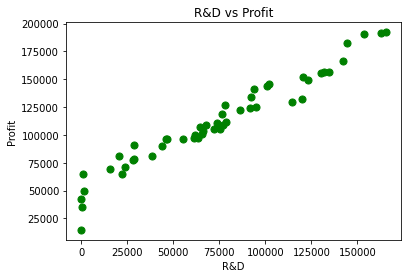

In [7]:
#Plot R&D vs Profit............
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()
# Từ sơ đồ trên, chúng ta có thể hình dung R&D và Profit có mối tương quan thuận theo đường hồi quy.

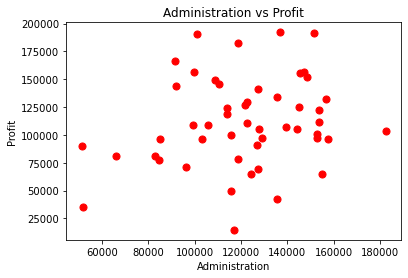

In [7]:
# Plot Administration vs Profit
x1 = dataset.iloc[:, 1].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Red',s=50)
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration vs Profit')
plt.show()
# Từ sơ đồ trên - Mối tương quan giữa Administration và Profit có sự rời rạc và không theo quy luật nào.

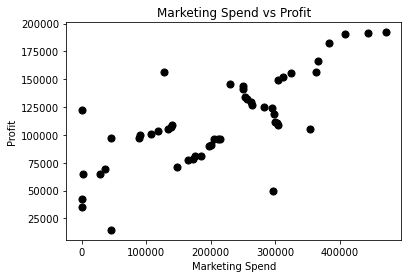

In [8]:
# Plot Marketing Spend vs Profit
x1 = dataset.iloc[:, 2].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Black',s=50)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend vs Profit')
plt.show()
# Từ biểu đồ trên -Tương quan cao giữa Marketing Spend và Profit.

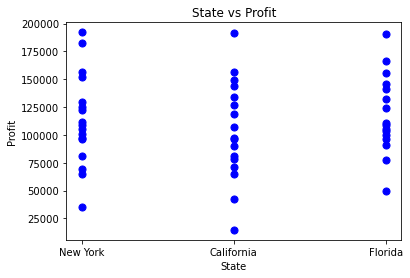

In [9]:
#Plot State vs Profit
x1 = dataset.iloc[:, 3].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Blue',s=50)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State vs Profit')
plt.show()

In [10]:
# Step 2 - Convert text variable "State" to numbers
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
X[:,3] = labelEncoder_X.fit_transform(X[:,3])
print(X[:5,:])

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 1]]


In [11]:
# Step 3 - Use OneHotEncoder để giới thiệu các biến giả
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [12]:
print(X[:5,:])

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]]


In [13]:
# Step 4 - Dummy Trap
X = X[:,1:]

In [14]:
# Step 5 - Split Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [15]:
print(X_test[:5,:])
print(y_test[:5])
print(X_train[:5,:])
print(y_train[:5])

[[1.0 0.0 66051.52 182645.56 118148.2]
 [0.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 27892.92 84710.77 164470.71]
 [1.0 0.0 153441.51 101145.55 407934.54]]
[103282.38 144259.4  146121.95  77798.83 191050.39]
[[1.0 0.0 55493.95 103057.49 214634.81]
 [0.0 1.0 46014.02 85047.44 205517.64]
 [1.0 0.0 75328.87 144135.98 134050.07]
 [0.0 0.0 46426.07 157693.92 210797.67]
 [1.0 0.0 91749.16 114175.79 294919.57]]
[ 96778.92  96479.51 105733.54  96712.8  124266.9 ]


In [16]:
# Step 6 - Fit Regressor - Huấn luyện mô hình
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
# Step 7 - Predict - Dự đoán bằng mô hình đã tạo với tập X_test
y_pred = regressor.predict(X_test)

In [18]:
print(y_test)
print(y_pred)

[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]


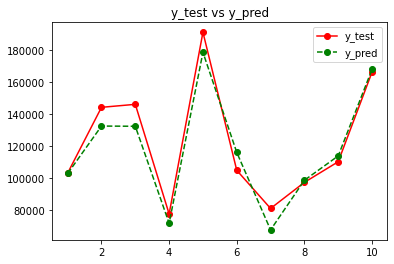

In [19]:
import numpy as np
plt.plot(np.arange(1,11),y_test,"ro-",label = "y_test")
plt.plot(np.arange(1,11),y_pred,"go--",label = "y_pred")
plt.title('y_test vs y_pred')
#plt.legend("y_test","y--")
plt.legend()
plt.rcParams['figure.figsize'] = 10,7
plt.show()

In [20]:
#Checking the score  
print('Train Score: ', regressor.score(X_train, y_train))  
print('Test Score: ', regressor.score(X_test, y_test))

Train Score:  0.9501847627493607
Test Score:  0.9347068473282966


In [21]:
# plt.rcParams['figure.figsize'] = [10, 10]
# plt.scatter(y_test, y_pred, s=20)
# plt.xlabel("Prices: $Y_i$")
# plt.ylabel("Predicted prices: $\hat{Y}_i$")
# plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [22]:
# Step 8: Backward Elimination
# Add ones
import numpy as np
ones = np.ones(shape = (50,1), dtype=int)
X = np.append(arr = ones, values= X, axis=1)

In [23]:
print(X[:5,:])

[[1 0.0 1.0 165349.2 136897.8 471784.1]
 [1 0.0 0.0 162597.7 151377.59 443898.53]
 [1 1.0 0.0 153441.51 101145.55 407934.54]
 [1 0.0 1.0 144372.41 118671.85 383199.62]
 [1 1.0 0.0 142107.34 91391.77 366168.42]]


In [24]:
# Backward Elimination
import statsmodels.regression.linear_model as sm
X_opt = X[:,[0,1,2,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())
# x1 dummy variable - Florida
# x2 dummy variable - New York
# x3 R&D spend
# x4 Administration spend
# x5 Marketing spend
# Remove x2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           1.34e-27
Time:                        08:55:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.0

In [25]:
X_opt = X[:,[0,1,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())
# x1 dummy variable - Florida
# x2 R&D spend
# x3 Administration spend
# x4 Marketing spend
# Remove x1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           8.49e-29
Time:                        08:55:02   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.0

In [26]:
X_opt = X[:,[0,3,4,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())
# x1 R&D spend
# x2 Administration spend
# x3 Marketing spend
# Remove x2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           4.53e-30
Time:                        08:55:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.0

In [27]:
X_opt = X[:,[0,3,5]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())
# x1 R&D spend
# x2 Marketing spend
# Remove x2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           2.16e-31
Time:                        08:55:03   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.0

In [28]:
X_opt = X[:,[0,3]]
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())
# x1 R&D spend

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        08:55:04   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [29]:
# importing libraries
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd  
  
#importing datasets  
dataset = pd.read_csv(r'Khoinghiep.csv')
  
#Extracting Independent and dependent Variable  
x_BE= dataset.iloc[:, 0].values  
y_BE= dataset.iloc[:, 4].values

# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_BE_train, x_BE_test, y_BE_train, y_BE_test= train_test_split(x_BE, y_BE, test_size= 0.2, random_state=0)
x_BE_train = np.array(x_BE_train).reshape(-1,1)
x_BE_test = np.array(x_BE_test).reshape(-1,1)

In [30]:
print(x_BE_train)
print(y_BE_train)
print(type(x_BE_train))
print(type(y_BE_train))
print(x_BE_train.shape)
print(y_BE_train.shape)

[[ 55493.95]
 [ 46014.02]
 [ 75328.87]
 [ 46426.07]
 [ 91749.16]
 [130298.13]
 [119943.24]
 [  1000.23]
 [   542.05]
 [ 65605.48]
 [114523.61]
 [ 61994.48]
 [ 63408.86]
 [ 78013.11]
 [ 23640.93]
 [ 76253.86]
 [ 15505.73]
 [120542.52]
 [ 91992.39]
 [ 64664.71]
 [131876.9 ]
 [ 94657.16]
 [ 28754.33]
 [     0.  ]
 [162597.7 ]
 [ 93863.75]
 [ 44069.95]
 [ 77044.01]
 [134615.46]
 [ 67532.53]
 [ 28663.76]
 [ 78389.47]
 [ 86419.7 ]
 [123334.88]
 [ 38558.51]
 [  1315.46]
 [144372.41]
 [165349.2 ]
 [     0.  ]
 [ 22177.74]]
[ 96778.92  96479.51 105733.54  96712.8  124266.9  155752.6  132602.65
  64926.08  35673.41 101004.64 129917.04  99937.59  97427.84 126992.93
  71498.49 118474.03  69758.98 152211.77 134307.35 107404.34 156991.12
 125370.37  78239.91  14681.4  191792.06 141585.52  89949.14 108552.04
 156122.51 108733.99  90708.19 111313.02 122776.86 149759.96  81005.76
  49490.75 182901.99 192261.83  42559.73  65200.33]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(40, 1)
(40,)


In [31]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()
regressor.fit(x_BE_train, y_BE_train)  



LinearRegression()

In [32]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_BE_train)

In [35]:
# Add ones
import numpy as np
ones = np.ones(shape = (50,1), dtype=int)
x_BE_sum = np.append(arr = ones, values= np.array(x_BE).reshape(-1,1), axis=1)

In [36]:
# Backward Elimination
import statsmodels.regression.linear_model as sm
X_opt = x_BE_sum
X_opt = np.array(X_opt, dtype=float)
regressor_OLS = sm.OLS(endog = y, exog=X_opt).fit()
print(regressor_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 29 Jun 2020   Prob (F-statistic):           3.50e-32
Time:                        08:59:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

In [37]:
x_BE_sum

array([[1.0000000e+00, 1.6534920e+05],
       [1.0000000e+00, 1.6259770e+05],
       [1.0000000e+00, 1.5344151e+05],
       [1.0000000e+00, 1.4437241e+05],
       [1.0000000e+00, 1.4210734e+05],
       [1.0000000e+00, 1.3187690e+05],
       [1.0000000e+00, 1.3461546e+05],
       [1.0000000e+00, 1.3029813e+05],
       [1.0000000e+00, 1.2054252e+05],
       [1.0000000e+00, 1.2333488e+05],
       [1.0000000e+00, 1.0191308e+05],
       [1.0000000e+00, 1.0067196e+05],
       [1.0000000e+00, 9.3863750e+04],
       [1.0000000e+00, 9.1992390e+04],
       [1.0000000e+00, 1.1994324e+05],
       [1.0000000e+00, 1.1452361e+05],
       [1.0000000e+00, 7.8013110e+04],
       [1.0000000e+00, 9.4657160e+04],
       [1.0000000e+00, 9.1749160e+04],
       [1.0000000e+00, 8.6419700e+04],
       [1.0000000e+00, 7.6253860e+04],
       [1.0000000e+00, 7.8389470e+04],
       [1.0000000e+00, 7.3994560e+04],
       [1.0000000e+00, 6.7532530e+04],
       [1.0000000e+00, 7.7044010e+04],
       [1.0000000e+00, 6.

In [31]:
#Cheking the score  
print('Train Score: ', regressor.score(x_BE_train, y_BE_train))  
print('Test Score: ', regressor.score(x_BE_test, y_BE_test))

Train Score:  0.9449589778363044
Test Score:  0.9464587607787219
